In [2]:
# Imports
import colorednoise as cn
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy.stats

%config InlineBackend.figure_format = 'svg'

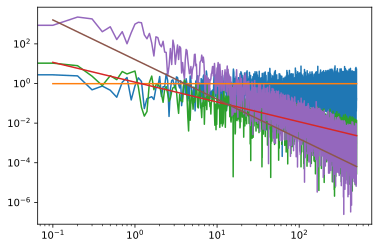

In [14]:
nsamps = 20002
fs = 1000
for a in np.linspace(0,2,3):
    normfactor = np.log(fs*nsamps/4) if a == 1 else ((fs/2)**(1-a) - (2/nsamps)**(1-a))/(1-a)
    # normfactor = 1
    data = cn.powerlaw_psd_gaussian(a, nsamps)[:nsamps//2] * np.sqrt(normfactor)
    freq, p = scipy.signal.welch(data, fs, nperseg=len(data))
    popt, pcov = scipy.optimize.curve_fit(lambda f, c: c / f**a, freq[1:], p[1:])
    plt.plot(freq, p, zorder=0)
    plt.plot(freq[1:], popt[0] / freq[1:]**a, zorder=1)
# plt.plot([1e-3, 10/2], [1,1])
plt.xscale("log")
plt.yscale("log")
# plt.xlim(0.1, 10)
# plt.ylim(0.1, 10)